In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_train_path = './train'
data_test_path = './test'
data_val_path = './validation'

In [3]:
img_width = 180
img_height = 180

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False, 
   
)


Found 1440 files belonging to 15 classes.


In [5]:
data_cat=data_train.class_names

In [6]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False, 
   
)


Found 1440 files belonging to 15 classes.


In [7]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False, 
   
)


Found 1440 files belonging to 15 classes.


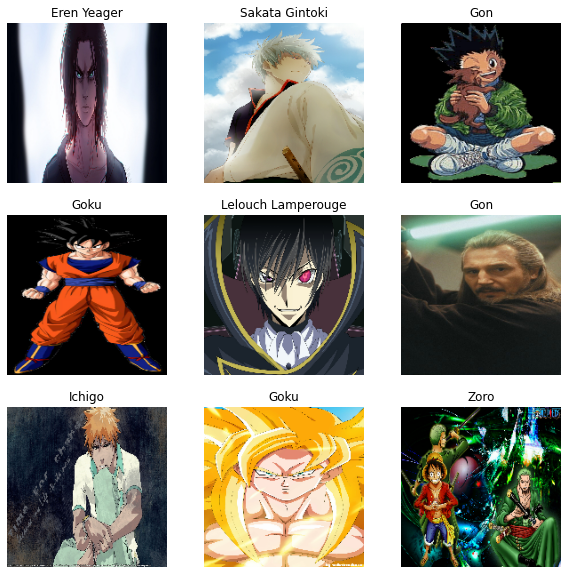

In [8]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [9]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
from tensorflow.keras import layers, Sequential

model = Sequential([
    layers.Rescaling(1./255),  # Normalize pixel values to [0,1]
    layers.Conv2D(16, 3, padding='same', activation='relu'),  # 16 filters, 3x3 kernel size
    layers.MaxPooling2D(),  # Max pooling layer
    layers.Conv2D(32, 3, padding='same', activation='relu'),  # 32 filters, 3x3 kernel size
    layers.MaxPooling2D(),  # Max pooling layer
    layers.Conv2D(64, 3, padding='same', activation='relu'),  # 64 filters, 3x3 kernel size
    layers.MaxPooling2D(),  # Max pooling layer
    layers.Flatten(),  # Flatten to connect to dense layers
    layers.Dropout(0.2),
    layers.Dense(128),  # Dense layer with 128 units
    layers.Dense(len(data_cat))
    
])


In [11]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [12]:
epochs_size = 32
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)


Epoch 1/32
 7/45 ━━━━━━━━━━━━━━━━━━━━ 21s 568ms/step - accuracy: 0.0744 - loss: 4.6370

InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_one_step_on_iterator_2389]